In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from scipy.cluster.vq import kmeans

In [4]:
def normalize(data):
    """Normalize a dataset
    
    This rescales each feature dimension,
    making things a bit more tractable for
    k-means.
    """
    return data / data.std(axis=0)

In [7]:
def plot_blobs(data, labels=None, centroids=None):
    """2D plot of our blob data
    
    Args:
        labels: cluster assignment labels
    """
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=100)
    
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.5);
    
    _ = ax.set_title('Blobs', fontsize=16)

In [27]:
x_train, y_train = datasets.make_blobs(n_samples=100, centers=3, n_features=3)

In [28]:
x_train = normalize(x_train)

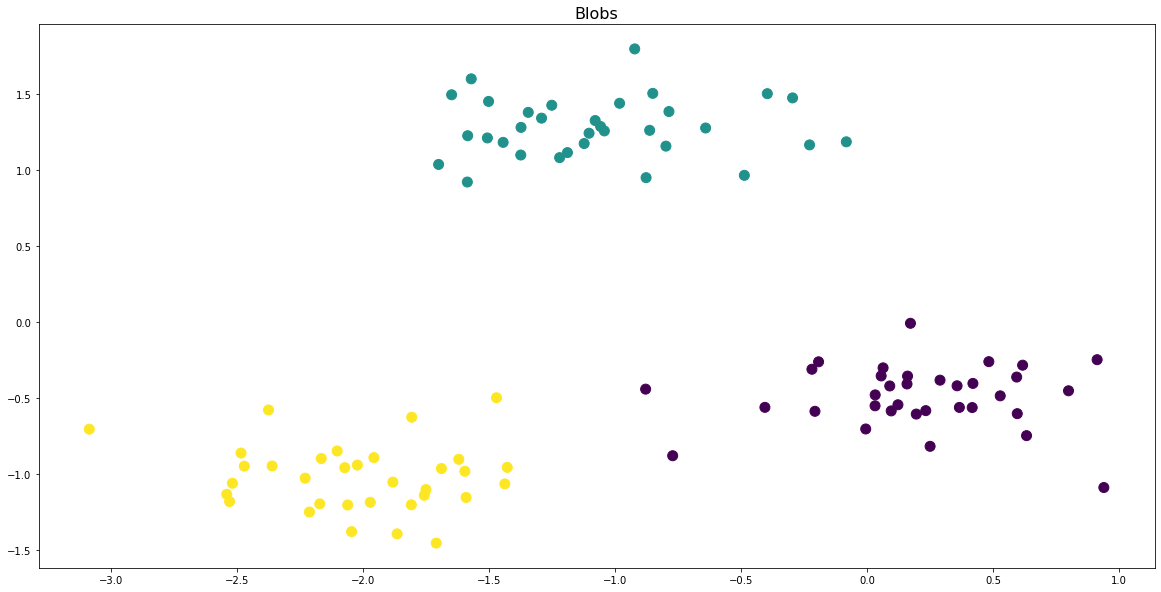

In [29]:
plot_blobs(x_train, y_train)

In [30]:
centroids, distortion = kmeans(x_train, 3)

In [31]:
centroids

array([[-1.06607164,  1.28129583,  0.85729943],
       [-2.02302477, -1.01820307, -1.33846642],
       [ 0.20413995, -0.4861559 , -1.13944431]])

In [32]:
distortion

0.4176050696270864

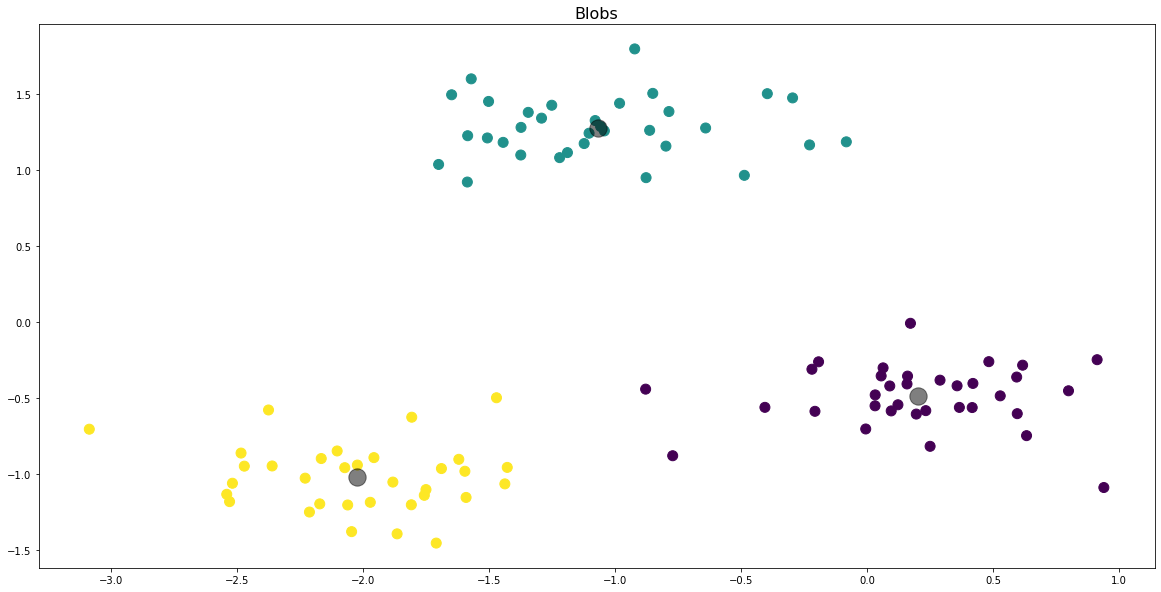

In [33]:
plot_blobs(x_train, y_train, centroids)

In [34]:
x_train.shape

(100, 3)

## Implement K-means Part Two

In [42]:
def euclidean_distace(x1, x2):
    return np.sum(np.square(x1 - x2))

In [38]:
def initialize_centroids(data, k):
    """Pick random k points as initial centroids"""
    num_samples, _ = data.shape
    idx = np.random.choice(num_samples, size=k, replace=False)
    return data[idx]

In [39]:
def kmeans(data, k, num_iter=100, threshold=1e-5):
    """"""
    minimal_distance = np.inf
    for _ in range(num_iter):
        centroids = initialize_centroids(data, k)
        centroids, distance = _kmeans(data, centroids, threshold=threshold)
        if distance < minimal_distance:
            best_centroids = centroids
            best_distance = distance
    return best_centroids, best_distance

In [ ]:
def _kmeans(data, centroids, threshold=1e-5):
    diff = np.inf
    while diff > threshold:
        prev_diff = diff
        code, min_dist = vector_quantize(data, centroids)
        
        
        

In [47]:
def vector_quantize(data, centroids):
    dist = euclidean_distance(data, centroids)
    code = dist.argmin(axis=1)
    min_dist = dist[np.arange(len(code)), code]
    return code, min_dist

In [48]:
def update_cluster_means(data, code, k):
    num_samples, num_features = data.shape
    codebook = np.zeros((k, num_features), dtype=np.float64)
    data_count = np.zeros(k)
    
    obs_p = data
    for i in range(num_samples):
        label = code[i]
        # this should be pointer arithmetic
        cb_p = codebook + num_features * label
        
        for j in range(num_features):
            cb_p[j] += obs_p[j]
            
        data_count[label] += 1
        obs_b += num_features
    
    for i in range(k):
        cluster_size = obs_cont[i]
        
        if cluster_size > 0:
            for j in range(num_features):
                cd_p[j] /= cluster_size
        
        cb_p += num_features
        
    has_members = data_count > 0
    
    return 